# Exercises for Lecture 13 (Training deep neural networks)

In [1]:
import numpy as np

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## Exercise 1: Build a deep neural network with ELU activation functions and batch normalisation and apply it to fashion MINST.

How good of an accuracy can you achieve on the test set?

In [11]:
import tensorflow as tf
from tensorflow import keras
from functools import partial

# to make this notebook's output stable across runs
def reset_state(seed=42):
    tf.keras.backend.clear_session()
    tf.random.set_seed(seed)
    np.random.seed(seed)

(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [14]:
model = keras.models.Sequential([model.add(keras.layers.Flatten(input_shape=[28, 28]))])
model.add(keras.layers.Flatten(input_shape=[28, 28]))
#上两排写法的另一种方式：
#model = keras.models.Sequential([keras.layers.Flatten(input_shape=[28, 28])])

for _ in range(20):
    model.add(keras.layers.Dense(100,
                                 activation="elu",
                                 kernel_initializer="he_normal"))
    model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 100)               78500     
_________________________________________________________________
batch_normalization_20 (Batc (None, 100)               400       
_________________________________________________________________
dense_22 (Dense)             (None, 100)               10100     
_________________________________________________________________
batch_normalization_21 (Batc (None, 100)               400       
_________________________________________________________________
dense_23 (Dense)             (None, 100)               10100     
_________________________________________________________________
batch_normalization_22 (Batc (None, 100)              

In [16]:
epochs = 10
history = model.fit(X_train, y_train, epochs=epochs,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 17s 7ms/step - loss: 1.6768 - accuracy: 0.4652 - val_loss: 0.6333 - val_accuracy: 0.7910
Epoch 2/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.7893 - accuracy: 0.7381 - val_loss: 0.5118 - val_accuracy: 0.8288
Epoch 3/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.6779 - accuracy: 0.7653 - val_loss: 0.4669 - val_accuracy: 0.8418
Epoch 4/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.6323 - accuracy: 0.7809 - val_loss: 0.4452 - val_accuracy: 0.8518
Epoch 5/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.6023 - accuracy: 0.7905 - val_loss: 0.4247 - val_accuracy: 0.8580
Epoch 6/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.5737 - accuracy: 0.8020 - val_loss: 0.4113 - val_accuracy: 0.8622
Epoch 7/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.5526 - accuracy: 0.8091 - val_loss: 0.3991 - val_ac

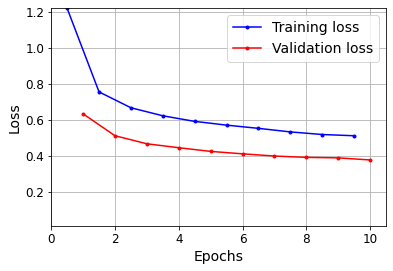

In [27]:
def plot_learning_curves(loss, val_loss):
    plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    plt.plot(np.arange(len(loss)) + 0.5, loss, "b.-", label="Training loss")
    plt.plot(np.arange(len(val_loss)) + 1, val_loss, "r.-", label="Validation loss")
    plt.axis([0, len(loss)+0.5, min(loss)-0.5, max(loss)])
    plt.legend(fontsize=14)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)
    
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

In [18]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4158 - accuracy: 0.8539


[0.41580450534820557, 0.8539000153541565]

In [30]:
history.history["val_loss"]

[0.633278489112854,
 0.511752724647522,
 0.4669455587863922,
 0.44524726271629333,
 0.4246940016746521,
 0.4112611413002014,
 0.39906060695648193,
 0.39158663153648376,
 0.3888191282749176,
 0.3771562874317169]

In [31]:
history.history["loss"]

[1.218984842300415,
 0.7551263570785522,
 0.6669933199882507,
 0.6224544644355774,
 0.5914247035980225,
 0.5704711675643921,
 0.5526847243309021,
 0.5329283475875854,
 0.5185407996177673,
 0.5115712285041809]